In [364]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn import metrics

In [365]:
# load dataset
data = pd.read_csv("titanic.csv")

In [366]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [367]:
# Visualization of data

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

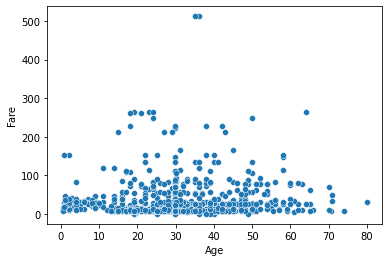

In [368]:
sns.scatterplot(dt['Age'],dt['Fare'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

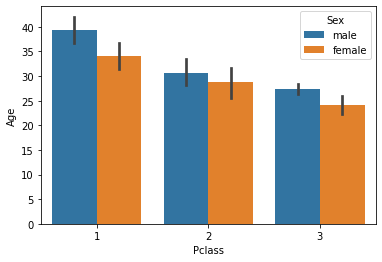

In [369]:
sns.barplot(dt['Pclass'],dt['Age'],hue=dt['Sex'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

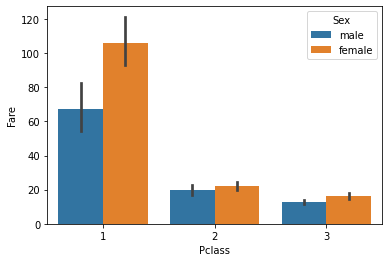

In [370]:
sns.barplot(dt['Pclass'],dt['Fare'],hue=dt['Sex'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

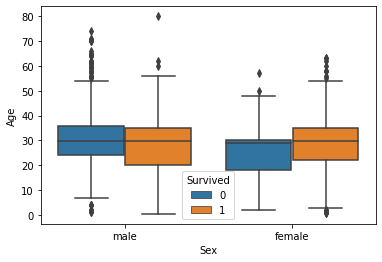

In [371]:
sns.boxplot(dt['Sex'],dt['Age'],hue=dt['Survived'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

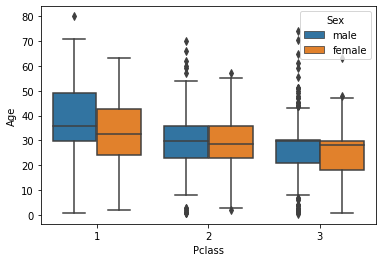

In [372]:
sns.boxplot(dt['Pclass'],dt['Age'],hue=dt['Sex'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

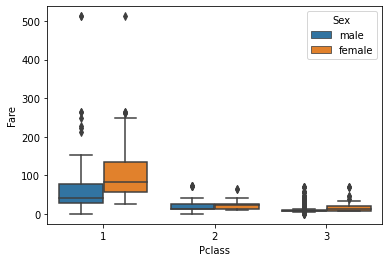

In [373]:
sns.boxplot(dt['Pclass'],dt['Fare'],hue=dt['Sex'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

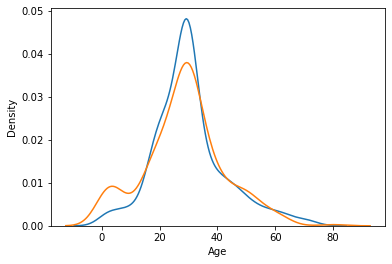

In [374]:
sns.distplot(dt[dt['Survived']==0]['Age'],hist=False) 
# PDA of people not survived

sns.distplot(dt[dt['Survived']==1]['Age'],hist=False) 
# PDA of people survived

In [375]:
pd.crosstab(dt['Pclass'],dt['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

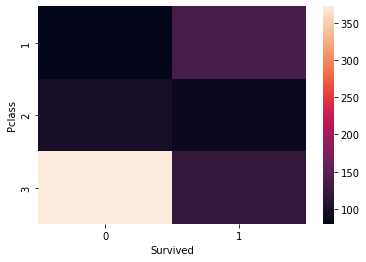

In [376]:
sns.heatmap(pd.crosstab(dt['Pclass'],dt['Survived']))

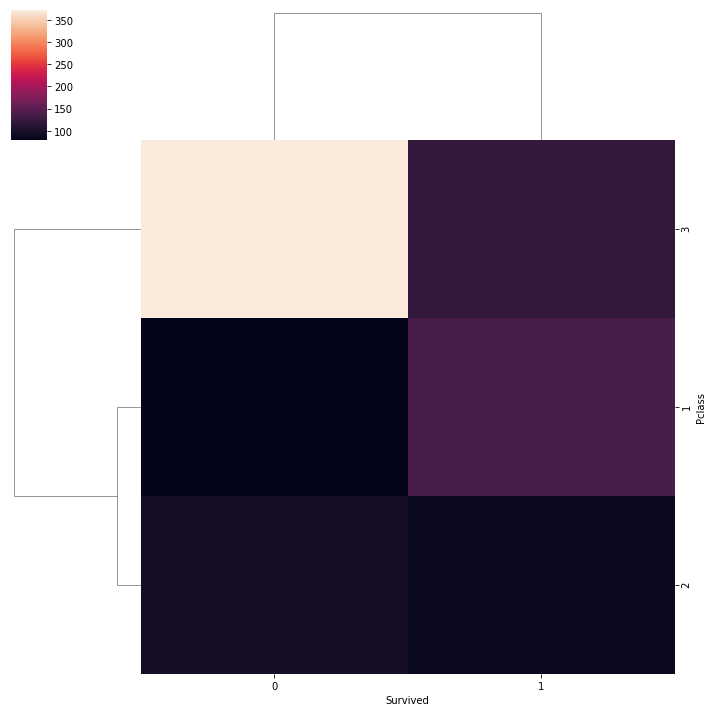

In [377]:
sns.clustermap(pd.crosstab(dt['Pclass'],dt['Survived']))

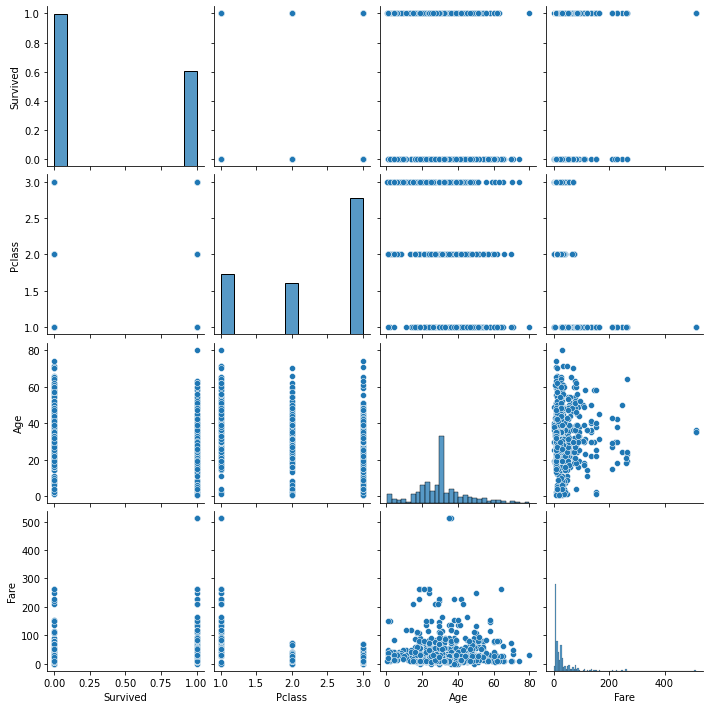

In [378]:
sns.pairplot(dt)

In [379]:
# Feature selection

In [380]:
dt = data.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"], axis = 'columns')

In [381]:
dt.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [382]:
dt.shape

(891, 5)

In [383]:
dt['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [384]:
dt.isnull().sum() 

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [385]:
# Age column have some null values so fill them with mean values
dt.Age = dt.Age.fillna(dt.Age.mean())

In [386]:
dt.head(15)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
5,0,3,male,29.699118,8.4583
6,0,1,male,54.000000,51.8625
7,0,3,male,2.000000,21.0750
8,1,3,female,27.000000,11.1333
9,1,2,female,14.000000,30.0708


In [387]:
dt.isnull().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [388]:
# Since we have a categorical value in our dataset. so convert it into numerical data

In [389]:
# OneHotEncoding using Pandas

In [390]:
dt_tranfrom = pd.get_dummies(dt,columns=['Sex'],drop_first=True)

In [391]:
dt_tranfrom

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,0
888,0,3,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [392]:
x_train , x_test , y_train , y_test = train_test_split(dt_tranfrom.iloc[:,1:5],dt_tranfrom.iloc[:,0],train_size=0.2,random_state=10)

In [393]:
print(x_train.shape , x_test.shape)

(178, 4) (713, 4)


In [394]:
print(y_train.shape , y_test.shape)

(178,) (713,)


In [395]:
x_train.head()

,Pclass,Age,Fare,Sex_male
213,2,30.0,13.000,1
465,3,38.0,7.050,1
206,3,32.0,15.850,1
665,2,32.0,73.500,1
885,3,39.0,29.125,0


In [396]:
y_train.head()

213    0
465    0
206    0
665    0
885    0
Name: Survived, dtype: int64

In [397]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))

Accuracy: 0.7405329593267882


In [398]:
for i in range(1,21):
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_predicted)
    print("Accuracy:",acc)

Accuracy: 0.7812061711079944
Accuracy: 0.7840112201963534
Accuracy: 0.8050490883590463
Accuracy: 0.7798036465638148
Accuracy: 0.7798036465638148
Accuracy: 0.7755960729312763
Accuracy: 0.7699859747545582
Accuracy: 0.7461430575035063
Accuracy: 0.7433380084151473
Accuracy: 0.7419354838709677
Accuracy: 0.7405329593267882
Accuracy: 0.7433380084151473
Accuracy: 0.7419354838709677
Accuracy: 0.7349228611500701
Accuracy: 0.7419354838709677
Accuracy: 0.7405329593267882
Accuracy: 0.7461430575035063
Accuracy: 0.7391304347826086
Accuracy: 0.7377279102384292
Accuracy: 0.7419354838709677


In [399]:
# maximum accuracy when maximum depth of tree is 3

In [400]:
input_data = (  1  ,22.000000   ,66.6000    ,0)

numpy_array= np.asarray(input_data)              # changing the input data to numpy array
reshaped_array = numpy_array.reshape(1,-1)       # reshaping the array as we are predicting for one instance

prediction = model.predict(reshaped_array)
print(prediction)

if (prediction[0]==0):
  print('Passenger Not Survived on titanic.')
else:
  print('Passenger Survived on titanic.')


[1]
Passenger Survived on titanic.
